# Birth rate proyect
In this notebook we will going to analyse the data base for this proyect

In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import math
import scipy

# Birth rate data paths
path_15_19 = r'./Data/birth_rate/2020_est_salut_publica_tax_espec_fec_mares_15_19a.csv'
path_20_34 = r'./Data/birth_rate/2020_est_salut_publica_tax_espec_fec_mares_20_34a.csv'
path_35_49 = r'./Data/birth_rate/2020_est_salut_publica_tax_espec_fec_mares_35_49a.csv'

# Income data paths
income_2016_path = r'./Data/income/2016_renda_neta_mitjana_per_persona.csv'
income_2017_path = r'./Data/income/2017_renda_neta_mitjana_per_persona.csv'
income_2018_path = r'./Data/income/2018_renda_neta_mitjana_per_persona.csv'
income_2019_path = r'./Data/income/2019_renda_neta_mitjana_per_persona.csv'
income_2020_path = r'./Data/income/2020_renda_neta_mitjana_per_persona.csv'

# Shapefiles path
barna_dist_path = r'./Data/shapefiles/BCN_UNITATS_ADM/0301040100_Districtes_UNITATS_ADM.shp'
barna_barris_path = r'./Data/shapefiles/BCN_UNITATS_ADM/0301040100_Barris_UNITATS_ADM.shp'

# Import of the files using pandas
# Import birth data
birth_15_19 = pd.read_csv(path_15_19)
birth_20_34 = pd.read_csv(path_20_34)
birth_35_49 = pd.read_csv(path_35_49)
# Import income data
income_2016 = pd.read_csv(income_2016_path)
income_2017 = pd.read_csv(income_2017_path)
income_2018 = pd.read_csv(income_2018_path)
income_2019 = pd.read_csv(income_2019_path)
income_2020 = pd.read_csv(income_2020_path)
# Import shapefiles of Barcelona
barna_dist = gpd.read_file(barna_dist_path)
barna_barris = gpd.read_file(barna_barris_path)

In [2]:
# Filterign the birth rate data for 2016-2020
birth_15_19 = birth_15_19[birth_15_19['Anys_Periode'] == '2016-2020']
birth_20_34 = birth_20_34[birth_20_34['Anys_Periode'] == '2016-2020']
birth_35_49 = birth_35_49[birth_35_49['Anys_Periode'] == '2016-2020']

# Distinguish between ages
birth_15_19['Age'] = '15-19'
birth_20_34['Age'] = '20-34'
birth_35_49['Age'] = '35-49'

birth_array = [birth_15_19, birth_20_34, birth_35_49]

# Merge the birth rate datafrmes
birth_rate_df = pd.concat(birth_array)
birth_rate_df = birth_rate_df.drop(columns='Anys_Periode')

# Change the code of the district from string to int in the shapefile
barna_dist['DISTRICTE'] = barna_dist['DISTRICTE'].astype(int)
barna_barris['DISTRICTE'] = barna_barris['DISTRICTE'].astype(int)

In [13]:
# The neighberhoods with the higher birth rate between 15 and 19 years old
birth_rate_df[birth_rate_df['Age'] == '35-49'].sort_values(by=['Nombre'], ascending=False).head(15)

,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Nombre,Age
1015,10,Sant Martí,67,la Vila Olímpica del Poblenou,40.8,35-49
980,6,Gràcia,32,el Camp d'en Grassot i Gràcia Nova,40.2,35-49
974,5,Sarrià-Sant Gervasi,26,Sant Gervasi - Galvany,38.9,35-49
979,6,Gràcia,31,la Vila de Gràcia,38.9,35-49
1014,10,Sant Martí,66,el Parc i la Llacuna del Poblenou,38.2,35-49
1017,10,Sant Martí,69,Diagonal Mar i el Front Marítim del Poblenou,37.9,35-49
967,4,Les Corts,19,les Corts,36.9,35-49
975,5,Sarrià-Sant Gervasi,27,el Putxet i el Farró,36.4,35-49
971,5,Sarrià-Sant Gervasi,23,Sarrià,36.1,35-49
978,6,Gràcia,30,la Salut,35.8,35-49


<Axes: >

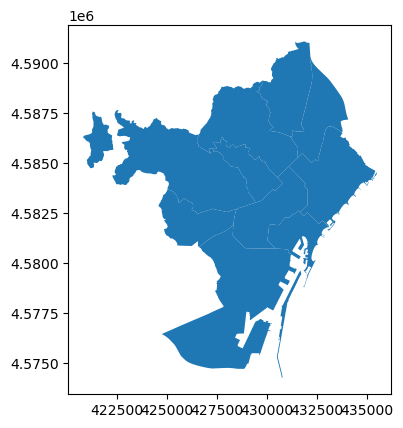

In [4]:
# Ploting the map of Barcelona per district
barna_dist.plot()

<Axes: >

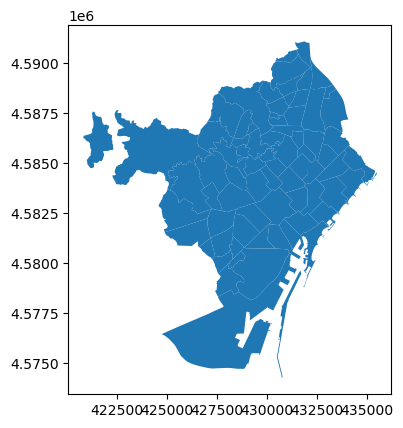

In [5]:
# Ploting Barcelona per neighberhoods
barna_barris.plot()

In [6]:
birth_rate_df

,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Nombre,Age
949,1,Ciutat Vella,1,el Raval,11.5,15-19
950,1,Ciutat Vella,2,el Barri Gòtic,2.7,15-19
951,1,Ciutat Vella,3,la Barceloneta,12.2,15-19
952,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",7.0,15-19
953,2,Eixample,5,el Fort Pienc,1.7,15-19
...,...,...,...,...,...,...
1017,10,Sant Martí,69,Diagonal Mar i el Front Marítim del Poblenou,37.9,35-49
1018,10,Sant Martí,70,el Besòs i el Maresme,25.2,35-49
1019,10,Sant Martí,71,Provençals del Poblenou,31.8,35-49
1020,10,Sant Martí,72,Sant Martí de Provençals,25.4,35-49


In [7]:
# Mean birth rate per district
birth_dist = birth_rate_df.groupby(['Nom_Districte', 'Codi_Districte'], as_index = False)['Nombre'].agg('mean')
birth_dist

,Nom_Districte,Codi_Districte,Nombre
0,Ciutat Vella,1,19.608333
1,Eixample,2,22.338889
2,Gràcia,6,25.000000
3,Horta-Guinardó,7,27.278788
4,Les Corts,4,25.211111
5,Nou Barris,8,29.841026
6,Sant Andreu,9,29.614286
7,Sant Martí,10,26.713333
8,Sants-Montjuïc,3,28.191667
9,Sarrià-Sant Gervasi,5,26.750000


In [17]:
# Mean birth rate per district and ages
birth_dist_teen = birth_15_19.groupby(['Nom_Districte', 'Codi_Districte'], as_index = False)['Nombre'].agg('mean')
birth_dist_adult = birth_20_34.groupby(['Nom_Districte', 'Codi_Districte'], as_index = False)['Nombre'].agg('mean')
birth_dist_old = birth_35_49.groupby(['Nom_Districte', 'Codi_Districte'], as_index = False)['Nombre'].agg('mean')

# Merge the mean birth rate df whit the shapefiles 
barna_dist_birth = barna_dist.merge(birth_dist, left_on = 'DISTRICTE', right_on = 'Codi_Districte')
# Merge the mean birth rate df whit the shapefiles per age
barna_dist_teen = barna_dist.merge(birth_dist_teen, left_on = 'DISTRICTE', right_on = 'Codi_Districte')
barna_dist_adult = barna_dist.merge(birth_dist_adult, left_on = 'DISTRICTE', right_on = 'Codi_Districte')
barna_dist_old = barna_dist.merge(birth_dist_old, left_on = 'DISTRICTE', right_on = 'Codi_Districte')

In [36]:
barna_dist_birth

,ID_ANNEX,ANNEXDESCR,ID_TEMA,TEMA_DESCR,ID_CONJUNT,CONJ_DESCR,ID_SUBCONJ,SCONJ_DESC,ID_ELEMENT,ELEM_DESCR,...,VALOR2QGIS,COL_FARCIT,FCOL_DESCR,FHEX_COLOR,COL_DESCR,HEX_COLOR7,geometry,Nom_Districte,Codi_Districte,Nombre
0,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,LÃ­mit de districte,...,0,1,Negre,#000000,Negre,#000000,"POLYGON ((431733.736 4582441.816, 431827.673 4...",Ciutat Vella,1,19.608333
1,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,LÃ­mit de districte,...,0,1,Negre,#000000,Negre,#000000,"POLYGON ((432033.184 4583665.032, 432032.069 4...",Eixample,2,22.338889
2,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,LÃ­mit de districte,...,0,1,Negre,#000000,Negre,#000000,"MULTIPOLYGON (((428773.911 4580873.742, 428833...",Sants-Montjuïc,3,28.191667
3,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,LÃ­mit de districte,...,0,1,Negre,#000000,Negre,#000000,"POLYGON ((425054.670 4583672.560, 425062.830 4...",Les Corts,4,25.211111
4,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,LÃ­mit de districte,...,0,1,Negre,#000000,Negre,#000000,"MULTIPOLYGON (((422563.071 4587486.743, 422568...",Sarrià-Sant Gervasi,5,26.750000
5,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,LÃ­mit de districte,...,0,1,Negre,#000000,Negre,#000000,"POLYGON ((427826.987 4586145.355, 427836.537 4...",Gràcia,6,25.000000
6,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,LÃ­mit de districte,...,0,1,Negre,#000000,Negre,#000000,"POLYGON ((426501.867 4586067.120, 426510.429 4...",Horta-Guinardó,7,27.278788
7,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,LÃ­mit de districte,...,0,1,Negre,#000000,Negre,#000000,"POLYGON ((429473.834 4588578.601, 429478.179 4...",Nou Barris,8,29.841026
8,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,LÃ­mit de districte,...,0,1,Negre,#000000,Negre,#000000,"POLYGON ((432158.516 4590377.238, 432158.904 4...",Sant Andreu,9,29.614286
9,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,LÃ­mit de districte,...,0,1,Negre,#000000,Negre,#000000,"POLYGON ((433770.023 4586475.362, 433737.125 4...",Sant Martí,10,26.713333


In [28]:
birth_dist_teen['Age'] = '15-19'
birth_dist_adult['Age'] = '20-34'
birth_dist_old['Age'] = '35-49'
birth_dist_all = pd.concat([birth_dist_teen, birth_dist_adult, birth_dist_old])
birth_dist_all

,Nom_Districte,Codi_Districte,Nombre,Age
0,Ciutat Vella,1,8.350000,15-19
1,Eixample,2,1.950000,15-19
2,Gràcia,6,2.480000,15-19
3,Horta-Guinardó,7,2.872727,15-19
4,Les Corts,4,1.166667,15-19
5,Nou Barris,8,11.130769,15-19
6,Sant Andreu,9,7.285714,15-19
7,Sant Martí,10,3.140000,15-19
8,Sants-Montjuïc,3,9.450000,15-19
9,Sarrià-Sant Gervasi,5,1.166667,15-19


C:\Users\User\AppData\Local\Temp\ipykernel_37912\511616956.py:9: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = fig.colorbar(sm)


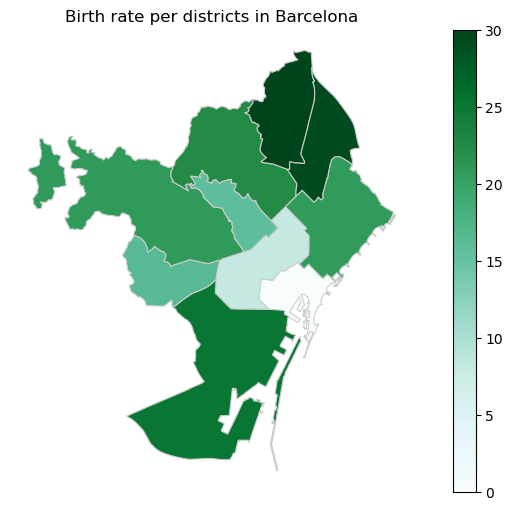

In [37]:
fig, ax = plt.subplots(1, figsize=(10, 6))
barna_dist_birth.plot(column = 'Nombre', cmap = 'BuGn', linewidth = 0.8, edgecolor = '0.8', ax = ax)
plt.axis('off')
plt.title('Birth rate per districts in Barcelona')
sm = plt.cm.ScalarMappable(cmap='BuGn', norm=plt.Normalize(vmin = 0, vmax = 30))

sm._A = []
# add the colorbar to the figure
cbar = fig.colorbar(sm)

(420079.1488400004, 436213.74996000016, 4573443.271199999, 4591905.2048)

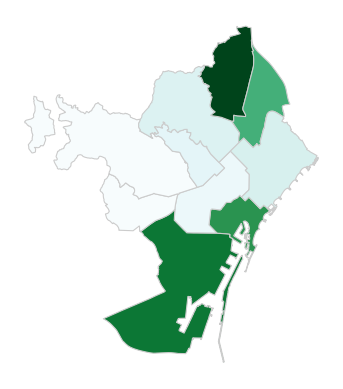

In [19]:
# Merge mean birth rate in teens with the shapefile
barna_dist_teen.plot(column = 'Nombre', cmap = 'BuGn', linewidth = 0.8, edgecolor = '0.8')
plt.axis('off')

(420079.1488400004, 436213.74996000016, 4573443.271199999, 4591905.2048)

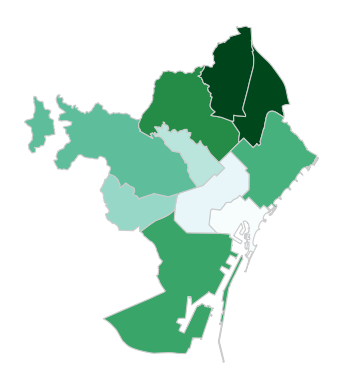

In [20]:
# Merge mean birth rate in joung adults with the shapefile
barna_dist_adult.plot(column = 'Nombre', cmap = 'BuGn', linewidth = 0.8, edgecolor = '0.8')
plt.axis('off')

(420079.1488400004, 436213.74996000016, 4573443.271199999, 4591905.2048)

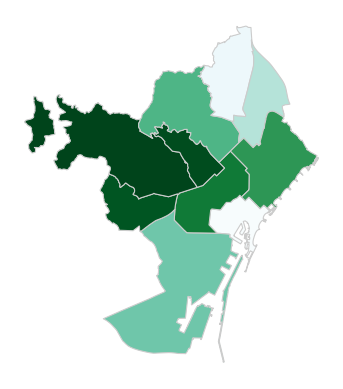

In [22]:
# Merge mean birth rate in adults with the shapefile
barna_dist_old.plot(column = 'Nombre', cmap = 'BuGn', linewidth = 0.8, edgecolor = '0.8')
plt.axis('off')

(424362.14482999995, 432631.2247699999, 4573443.271199999, 4591905.2048)

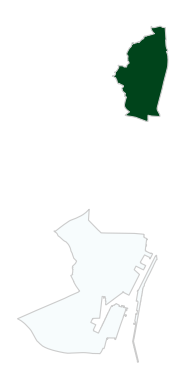

In [21]:
filtering_exp = barna_dist_teen[(barna_dist_teen['DISTRICTE'] == 8) | (barna_dist_teen['DISTRICTE'] == 3)]
filtering_exp.plot(column = 'Nombre', cmap = 'BuGn', linewidth = 0.8, edgecolor = '0.8')
plt.axis('off')